# About Dataset


<img src="https://github.com/Kodchalerk/Portfolio-project/blob/main/Raw%20Data/Angryman.jpg?raw=True" alt="Drawing" style="width: 300px;"/>



Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's

products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's

services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

Understanding customer churn is crucial for businesses to identify patterns, factors, and indicators that contribute to customer attrition.

By analyzing churn behavior and its associated features, companies can develop strategies to retain existing customers, improve customer satisfaction, and reduce customer turnover. Predictive modeling 

techniques can also be applied to forecast and proactively address potential churn, enabling companies to take proactive measures to retain at-risk customers.

**Link to dateset:** https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

## Aims

The goal of this notebook is to discover insights by performing customer segmentation using k-means clustering algorithm and building the classification model to predict the churn probability.


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
import plotly.express as px
from datetime import datetime, date
warnings.filterwarnings("ignore")

try:
    import lime
except:
    !pip install lime
    from lime import lime_tabular
    
try:
    import lazypredict
except:
    !pip install lazypredict
    from lazypredict.Supervised import LazyClassifier
    
try:
    import kneed
except:
    !pip install kneed
    from kneed import KneeLocator

In [2]:
#Read datset
df = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.00,30.00,Female,39.00,14.00,5.00,18.00,Standard,Annual,932.00,17.00,1.00
1,3.00,65.00,Female,49.00,1.00,10.00,8.00,Basic,Monthly,557.00,6.00,1.00
2,4.00,55.00,Female,14.00,4.00,6.00,18.00,Basic,Quarterly,185.00,3.00,1.00
3,5.00,58.00,Male,38.00,21.00,7.00,7.00,Standard,Monthly,396.00,29.00,1.00
4,6.00,23.00,Male,32.00,20.00,5.00,8.00,Basic,Monthly,617.00,20.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.00,42.00,Male,54.00,15.00,1.00,3.00,Premium,Annual,716.38,8.00,0.00
440829,449996.00,25.00,Female,8.00,13.00,1.00,20.00,Premium,Annual,745.38,2.00,0.00
440830,449997.00,26.00,Male,35.00,27.00,1.00,5.00,Standard,Quarterly,977.31,9.00,0.00
440831,449998.00,28.00,Male,55.00,14.00,2.00,0.00,Standard,Quarterly,602.55,2.00,0.00


# Data Cleaning

In [3]:
# Change column names
df.columns = [i.lower().replace(' ','_') for i in df.columns]
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [4]:
# Check missing values
df.isnull().sum()

customerid           1
age                  1
gender               1
tenure               1
usage_frequency      1
support_calls        1
payment_delay        1
subscription_type    1
contract_length      1
total_spend          1
last_interaction     1
churn                1
dtype: int64

In [5]:
# Drop missing value
df.dropna(axis = 0 , inplace = True)

In [6]:
# Check Duplicated values
df.duplicated().sum()

0

In [7]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customerid         440832 non-null  float64
 1   age                440832 non-null  float64
 2   gender             440832 non-null  object 
 3   tenure             440832 non-null  float64
 4   usage_frequency    440832 non-null  float64
 5   support_calls      440832 non-null  float64
 6   payment_delay      440832 non-null  float64
 7   subscription_type  440832 non-null  object 
 8   contract_length    440832 non-null  object 
 9   total_spend        440832 non-null  float64
 10  last_interaction   440832 non-null  float64
 11  churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [8]:
#Check data accuracy
frame = []
for i in df.columns:
    print('Name of columns: {}'.format(i))
    print('Unique Values: {}'.format(df[i].unique()))
    print('Number of Unique Values: {}'.format(df[i].nunique()))
    print('----------------------------------------------------')   

Name of columns: customerid
Unique Values: [2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]
Number of Unique Values: 440832
----------------------------------------------------
Name of columns: age
Unique Values: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]
Number of Unique Values: 48
----------------------------------------------------
Name of columns: gender
Unique Values: ['Female' 'Male']
Number of Unique Values: 2
----------------------------------------------------
Name of columns: tenure
Unique Values: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]
Number of Unique Values: 60
-------------------------------

# Exploratory Data Analysis

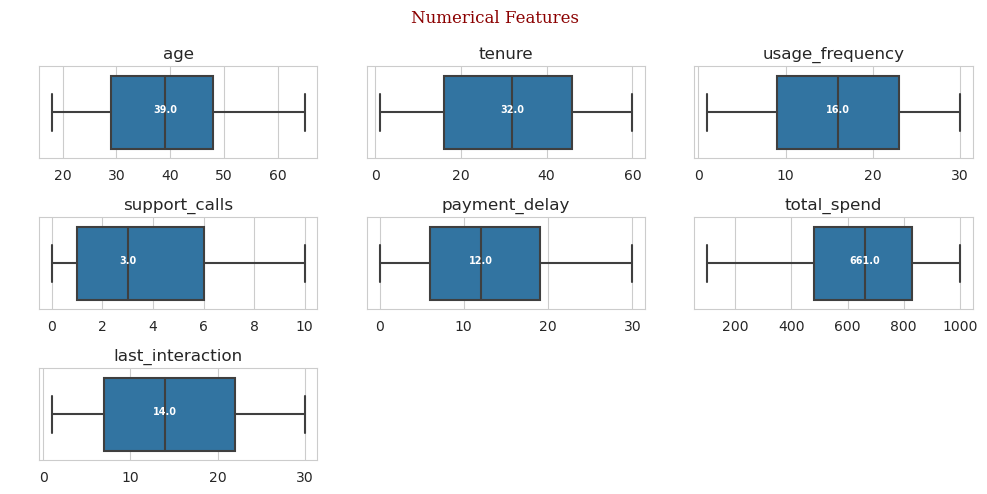

In [9]:
# Check numerical columns
col_features = df.select_dtypes(['float64' , 'int64'])
col_features = col_features[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = col_features , x = j)
    #Calculate median
    median = df[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

In [10]:
# Additional Info
col_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,440832.00,39.37,12.44,18.00,29.00,39.00,48.00,65.00
tenure,440832.00,31.26,17.26,1.00,16.00,32.00,46.00,60.00
usage_frequency,440832.00,15.81,8.59,1.00,9.00,16.00,23.00,30.00
support_calls,440832.00,3.60,3.07,0.00,1.00,3.00,6.00,10.00
payment_delay,440832.00,12.97,8.26,0.00,6.00,12.00,19.00,30.00
total_spend,440832.00,631.62,240.80,100.00,480.00,661.00,830.00,1000.00
last_interaction,440832.00,14.48,8.60,1.00,7.00,14.00,22.00,30.00


- It seems there are no outliers and anomalies in numerical features.

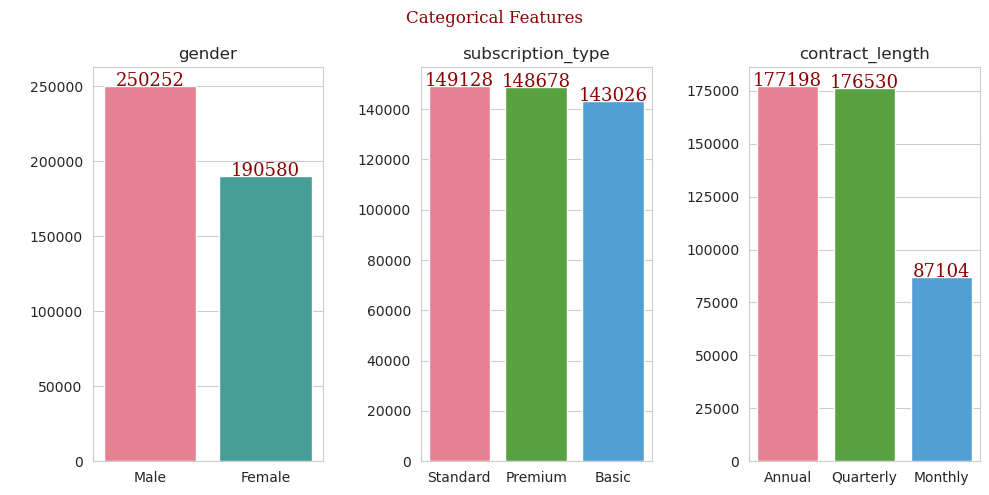

In [11]:
col_categorical = df.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = df[j].value_counts().sort_values(ascending = False).to_frame() ,x = df[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'husl' )
    #Create text
    text = df[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

Text(0.5, 1.0, 'Target Variable')

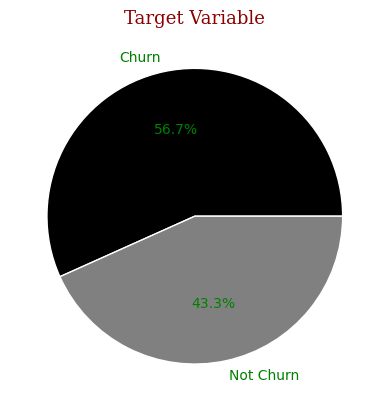

In [12]:
# Target variable
plt.pie(data = df['churn'].value_counts().to_frame() ,labels = ['Churn','Not Churn'], x = 'churn' , autopct = '%1.1f%%' ,colors = ['black','grey'],textprops={'color':"g"} )
plt.title('Target Variable' , fontdict = font)

- The target variables are imbalance. We will deal with this later.

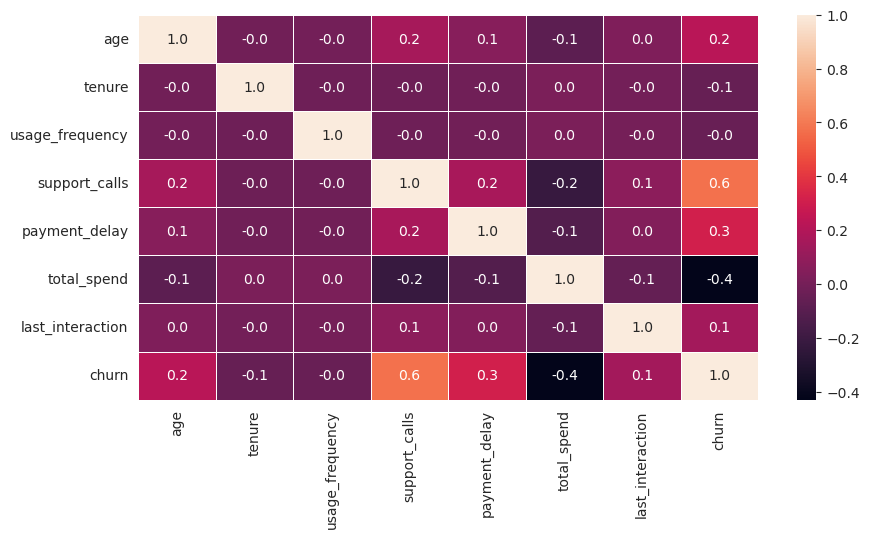

In [13]:
matrix = df[['age', 'gender', 'tenure', 'usage_frequency','support_calls', 'payment_delay','contract_length', 'total_spend', 'last_interaction','churn']]

fig,ax=plt.subplots(figsize = (10,5))
sns.heatmap(matrix.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax);

- It seemes there will be no multicollinearity problem.

# Data preprocessing for Clustering analysis

In [14]:
df1 = df.copy()
df1

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2.00,30.00,Female,39.00,14.00,5.00,18.00,Standard,Annual,932.00,17.00,1.00
1,3.00,65.00,Female,49.00,1.00,10.00,8.00,Basic,Monthly,557.00,6.00,1.00
2,4.00,55.00,Female,14.00,4.00,6.00,18.00,Basic,Quarterly,185.00,3.00,1.00
3,5.00,58.00,Male,38.00,21.00,7.00,7.00,Standard,Monthly,396.00,29.00,1.00
4,6.00,23.00,Male,32.00,20.00,5.00,8.00,Basic,Monthly,617.00,20.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.00,42.00,Male,54.00,15.00,1.00,3.00,Premium,Annual,716.38,8.00,0.00
440829,449996.00,25.00,Female,8.00,13.00,1.00,20.00,Premium,Annual,745.38,2.00,0.00
440830,449997.00,26.00,Male,35.00,27.00,1.00,5.00,Standard,Quarterly,977.31,9.00,0.00
440831,449998.00,28.00,Male,55.00,14.00,2.00,0.00,Standard,Quarterly,602.55,2.00,0.00


In [15]:
# Label encode data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['gender'] = le.fit_transform(df1['gender'])
df1['subscription_type'] = le.fit_transform(df1['subscription_type'])
df1['contract_length'] = le.fit_transform(df1['contract_length'])
df1


,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2.00,30.00,0,39.00,14.00,5.00,18.00,2,0,932.00,17.00,1.00
1,3.00,65.00,0,49.00,1.00,10.00,8.00,0,1,557.00,6.00,1.00
2,4.00,55.00,0,14.00,4.00,6.00,18.00,0,2,185.00,3.00,1.00
3,5.00,58.00,1,38.00,21.00,7.00,7.00,2,1,396.00,29.00,1.00
4,6.00,23.00,1,32.00,20.00,5.00,8.00,0,1,617.00,20.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.00,42.00,1,54.00,15.00,1.00,3.00,1,0,716.38,8.00,0.00
440829,449996.00,25.00,0,8.00,13.00,1.00,20.00,1,0,745.38,2.00,0.00
440830,449997.00,26.00,1,35.00,27.00,1.00,5.00,2,2,977.31,9.00,0.00
440831,449998.00,28.00,1,55.00,14.00,2.00,0.00,2,2,602.55,2.00,0.00


In [16]:
# Drop unused column
df1.drop(columns = 'customerid' , inplace = True)

In [17]:
df1.columns

Index(['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction', 'churn'],
      dtype='object')

In [18]:
# Scale Data

from sklearn.preprocessing import StandardScaler

#Import model
scaler = StandardScaler()

#Choose columns
numerical_columns = ['age','tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'total_spend','last_interaction']

#Copy Dataframe
df1_scaled = df1.copy()

#Transform each column
for i in numerical_columns:
    df1_scaled[i] = scaler.fit_transform(df1_scaled[[i]])

In [19]:
df1_scaled

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,-0.75,0,0.45,-0.21,0.45,0.61,2,0,1.25,0.29,1.00
1,2.06,0,1.03,-1.72,2.08,-0.60,0,1,-0.31,-0.99,1.00
2,1.26,0,-1.00,-1.38,0.78,0.61,0,2,-1.85,-1.34,1.00
3,1.50,1,0.39,0.60,1.11,-0.72,2,1,-0.98,1.69,1.00
4,-1.32,1,0.04,0.49,0.45,-0.60,0,1,-0.06,0.64,1.00
...,...,...,...,...,...,...,...,...,...,...,...
440828,0.21,1,1.32,-0.09,-0.85,-1.21,1,0,0.35,-0.75,0.00
440829,-1.16,0,-1.35,-0.33,-0.85,0.85,1,0,0.47,-1.45,0.00
440830,-1.07,1,0.22,1.30,-0.85,-0.96,2,2,1.44,-0.64,0.00
440831,-0.91,1,1.38,-0.21,-0.52,-1.57,2,2,-0.12,-1.45,0.00


- In this cluster problem, we want to segment customers base on the following five features.

In [20]:
df_cluster = df1_scaled[['usage_frequency','support_calls','tenure','payment_delay','total_spend']]
df_cluster

,usage_frequency,support_calls,tenure,payment_delay,total_spend
0,-0.21,0.45,0.45,0.61,1.25
1,-1.72,2.08,1.03,-0.60,-0.31
2,-1.38,0.78,-1.00,0.61,-1.85
3,0.60,1.11,0.39,-0.72,-0.98
4,0.49,0.45,0.04,-0.60,-0.06
...,...,...,...,...,...
440828,-0.09,-0.85,1.32,-1.21,0.35
440829,-0.33,-0.85,-1.35,0.85,0.47
440830,1.30,-0.85,0.22,-0.96,1.44
440831,-0.21,-0.52,1.38,-1.57,-0.12


# Modelling Cluster

## Finding number of clusters by Elbow method

In [21]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

inertia = []
num_clusters = list(range(1,10))

for k in num_clusters:
    #Instantiate model in range k
    kmeans = KMeans(n_clusters = k)
    #fit model
    kmeans.fit(df_cluster)
    #append the SSE in k cluster to the list
    inertia.append(kmeans.inertia_)

In [22]:
# Find the elbow spot
cost_kneed = KneeLocator(x = num_clusters , y = inertia , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
K_cost_c3 = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(K_cost_c3))

Elbow at k = 4 clusters


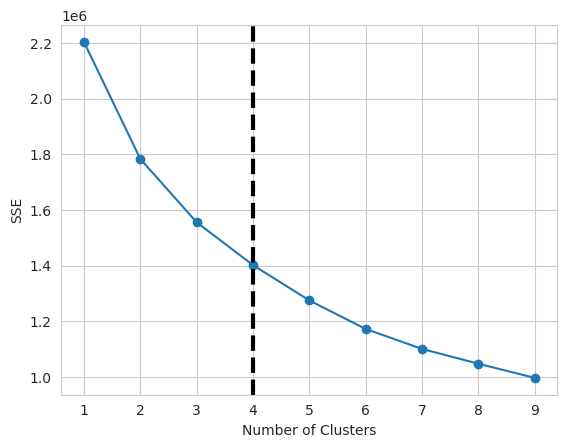

In [23]:
#Plot the graph
plt.plot(num_clusters , inertia , 'o-')    
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
#plot vertical line at the elbow spot
plt.axvline(x=K_cost_c3, color='black', label='axvline-fullheight', ls='--', linewidth=3)

- According to the elbow method, 4 is the optimal number of clusters.

## Label data and assign to dataset

In [24]:
model = KMeans(n_clusters = 4)
model.fit(df_cluster)

KMeans(n_clusters=4)

In [25]:
model.labels_

array([3, 1, 1, ..., 2, 3, 2], dtype=int32)

In [26]:
#assign cluster in data set
df['cluster'] = model.labels_
# +1 cluster
df['cluster'] = df['cluster'].apply(lambda x : x+1)

# Cluster analysis

In [27]:
dfs = df[['usage_frequency','support_calls','tenure','payment_delay','total_spend','cluster']]

### Heatmap of each attribute in clusters.

- The value in heatmap shows the median of each attribute in each cluster.

Text(0.5, 1.0, 'Heat map of Median in each cluster')

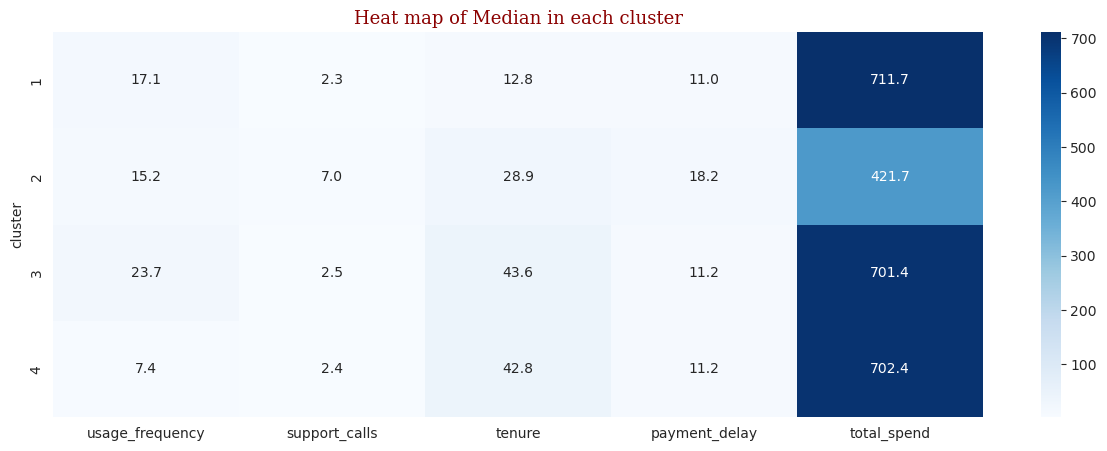

In [28]:
median = dfs.groupby('cluster')['usage_frequency','support_calls','tenure','payment_delay','total_spend'].mean()
fig = plt.figure(figsize = (15,5))
sns.heatmap(data = median , cmap = 'Blues' , annot = True, fmt = ".1f" )
plt.title('Heat map of Median in each cluster' , fontdict = font)

### Visualize members in cluster 1

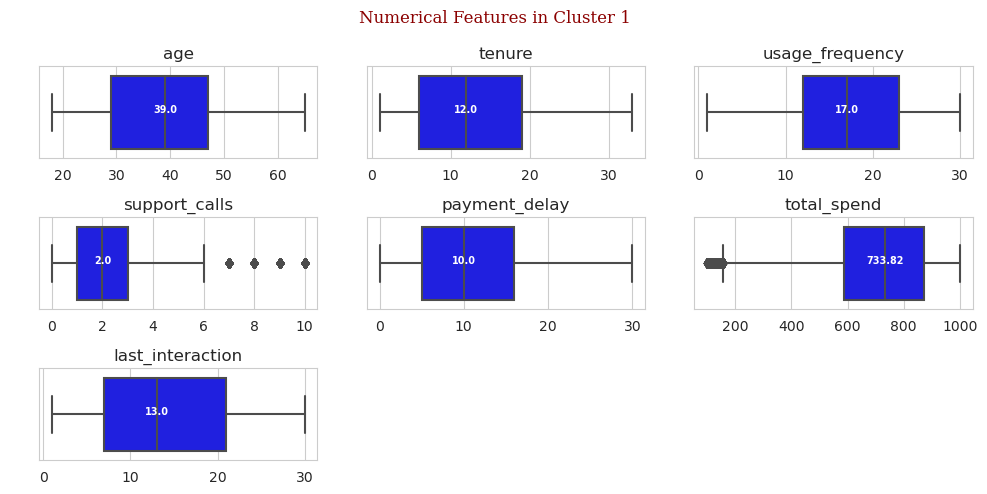

In [29]:
cluster_1 = df[df['cluster'] == 1]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 1' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j , color = 'blue')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

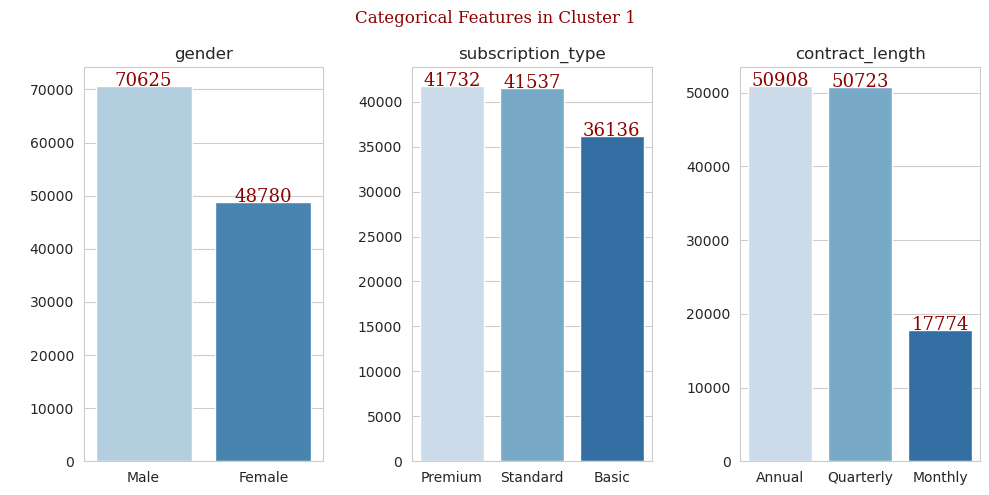

In [30]:
cluster_1_object = cluster_1.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features in Cluster 1' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame() ,x = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'Blues' )
    #Create text
    text = cluster_1_object[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

### Visualize members in cluster 2

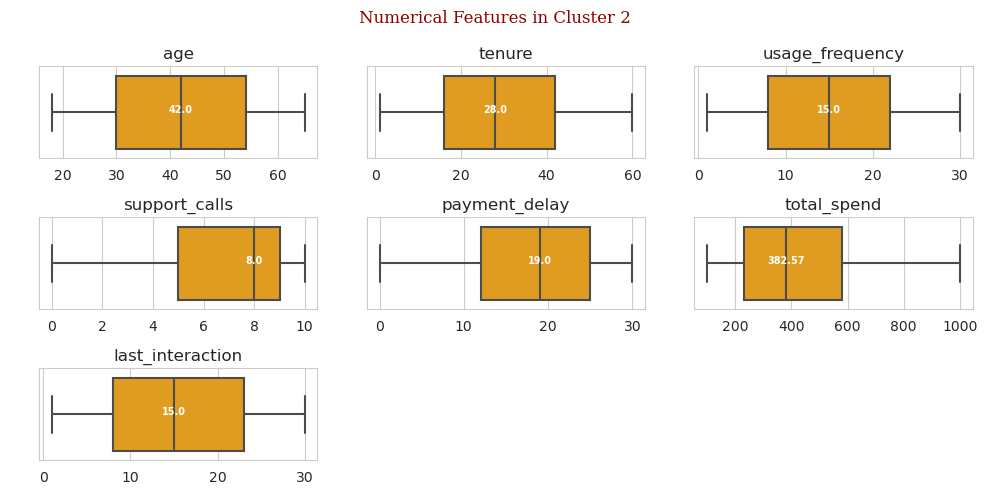

In [31]:
cluster_1 = df[df['cluster'] == 2]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 2' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j , color = 'orange')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

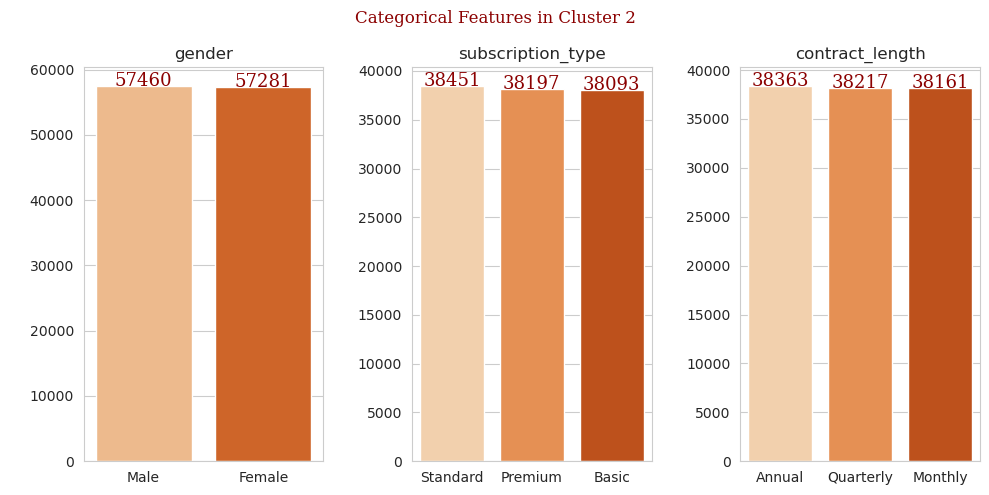

In [32]:
cluster_1_object = cluster_1.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features in Cluster 2' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame() ,x = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'Oranges' )
    #Create text
    text = cluster_1_object[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

### Visualize members in Cluster 3

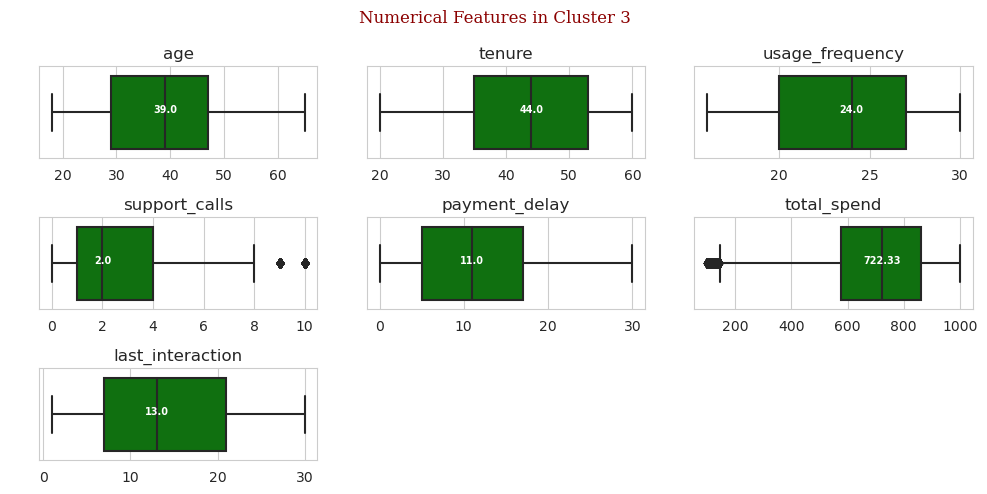

In [33]:
cluster_1 = df[df['cluster'] == 3]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 3' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j , color = 'green')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

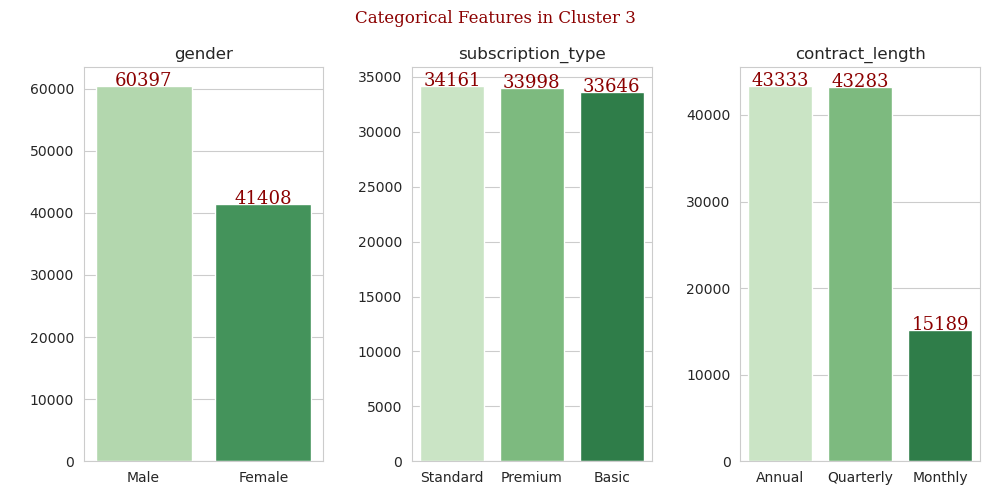

In [34]:
cluster_1_object = cluster_1.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features in Cluster 3' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame() ,x = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'Greens' )
    #Create text
    text = cluster_1_object[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

### Visualize members in Cluster 4

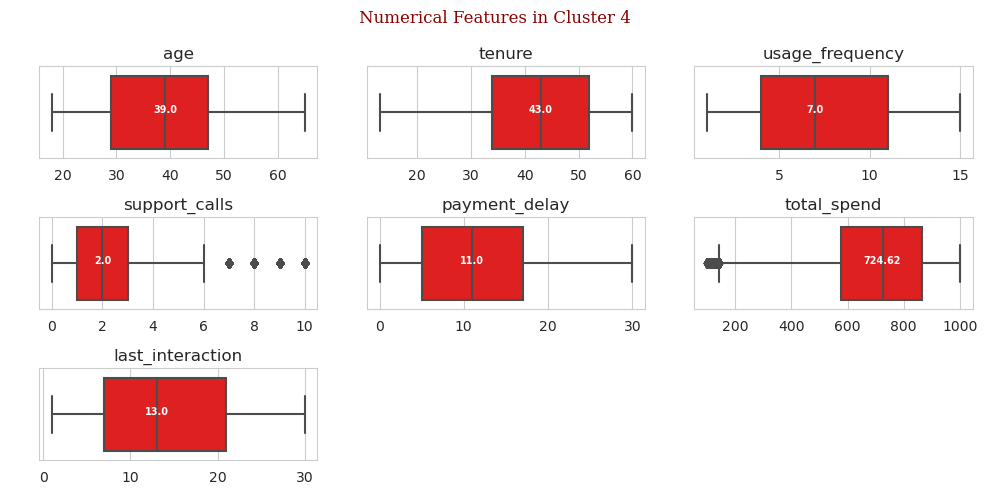

In [35]:
cluster_1 = df[df['cluster'] == 4]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 4' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j, color = 'red')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

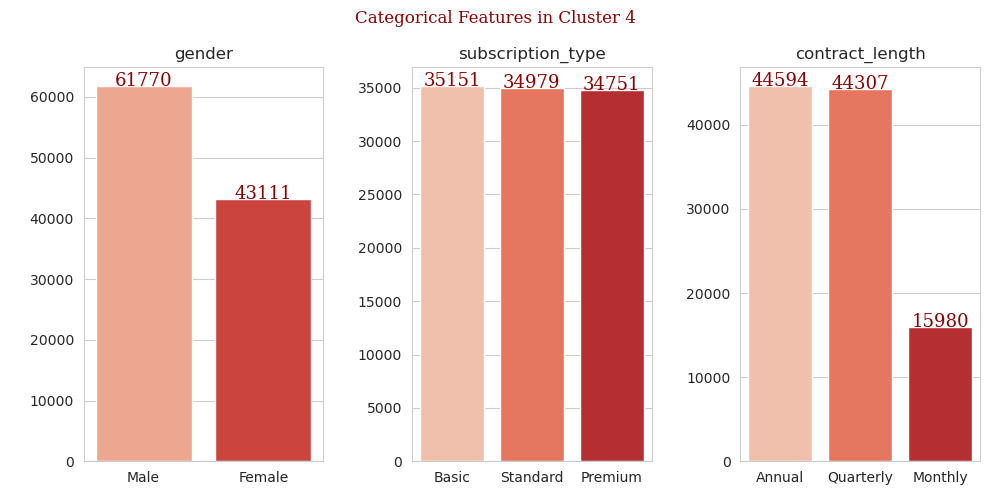

In [36]:
cluster_1_object = cluster_1.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features in Cluster 4' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame() ,x = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'Reds' )
    #Create text
    text = cluster_1_object[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

## Visualize Customer churn in each cluster

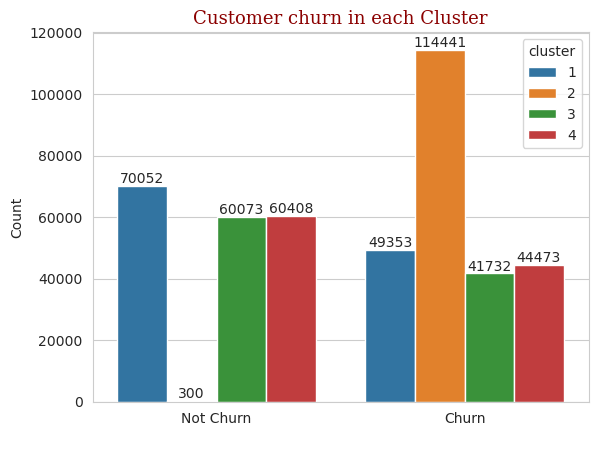

In [37]:
ax = sns.countplot(df , x = 'churn' , hue = 'cluster')
plt.title('Customer churn in each Cluster' , fontdict= font)
plt.xticks(ticks = [0  , 1] , labels = ['Not Churn','Churn'])
plt.xlabel(' ')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i)

Interestingly, Most of the customers who churn are in ***cluster number three.***

The cluster three is characterized by the customer who is in middle-age (Around 40 years old) , spent less compared to other clusters and has high number of support calls.

In [38]:
df[df['cluster'] == 3].median()

customerid         286630.00
age                    39.00
tenure                 44.00
usage_frequency        24.00
support_calls           2.00
payment_delay          11.00
total_spend           722.33
last_interaction       13.00
churn                   0.00
cluster                 3.00
dtype: float64

**According to the explainer above, we can draw the following conclusions**
1. Female customers prone to churn more than male.
2. Customer with age more than an average (40 years old) has higher probability of churn.
3. Customer with short-term contract (Monthly contract) tends to churn more than customer with long-term contract (Quaterly and Annual)
4. Customer who call for supports more than four times increase the probability of churn.
5. Customer with payment delay higher than an average of the sample (12 months) has higher proablity to churn.
6. Customer with lower spending score tends to churn more than customer with higher spending score.
7. Customer with up to date interaction tends to churn less.